In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,AveragePooling2D
from keras import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt

2025-10-18 12:16:40.349040: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760789800.629863      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760789800.700801      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# data scaling
X_train.max(),y_train.max(),X_train.min(),y_train.min()

(255, 9, 0, 0)

In [6]:
#reshaping into(28,28,1) and scaling of data 
X_train_scaled=X_train.reshape(-1,28,28,1).astype('float32')/X_train.max()
X_test_scaled=X_test.reshape(-1,28,28,1).astype('float32')/X_test.max()
#reshaping into(32,32,1)
X_train_scaled=np.pad(X_train_scaled,((0,0),(2,2),(2,2),(0,0)),'constant')
X_test_scaled=np.pad(X_test_scaled,((0,0),(2,2),(2,2),(0,0)),'constant')
#one hot encoding of y_train and y_test data
y_train_onehot=tf.one_hot(y_train,depth=10)
y_test_onehot=tf.one_hot(y_test,depth=10)

I0000 00:00:1760789815.351714      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1760789815.352423      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [7]:
X_train_scaled.shape,X_test_scaled.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

In [8]:
X_train_scaled.max(),X_train_scaled.min(),X_test_scaled.max(),X_test_scaled.min()

(1.0, 0.0, 1.0, 0.0)

# Define LeNet-5 model

In [9]:
model=Sequential()
#c1 convolution layer
model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(32,32,1)))
# s2 subsampling layer
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))
# c3 convolution layer
model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh'))
# s4 subsampling layer
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#compile the model
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
losses=tf.keras.losses.CategoricalCrossentropy
metrics=['accuracy']
model.compile(optimizer=optimizer,loss=losses,metrics=metrics)
#fit the model
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history=model.fit(X_train_scaled,y_train_onehot,epochs=100,callbacks=[early_stopping],batch_size=128,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/100


I0000 00:00:1760789819.872763      59 service.cc:148] XLA service 0x79c080006060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760789819.873859      59 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760789819.873877      59 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760789820.166047      59 cuda_dnn.cc:529] Loaded cuDNN version 90300


 62/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6070 - loss: 1.4028

I0000 00:00:1760789822.620907      59 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8315 - loss: 0.5989 - val_accuracy: 0.9550 - val_loss: 0.1495
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9598 - loss: 0.1367 - val_accuracy: 0.9720 - val_loss: 0.0952
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9756 - loss: 0.0820 - val_accuracy: 0.9777 - val_loss: 0.0715
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9808 - loss: 0.0628 - val_accuracy: 0.9803 - val_loss: 0.0613
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9862 - loss: 0.0457 - val_accuracy: 0.9834 - val_loss: 0.0516
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9892 - loss: 0.0368 - val_accuracy: 0.9823 - val_loss: 0.0536
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9862 - val_loss: 0.0444
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9923 - loss: 0.0247 - val_accuracy: 0.9831

In [12]:
#evaluate the model
loss,acc=model.evaluate(X_test_scaled,y_test_onehot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9821 - loss: 0.0548


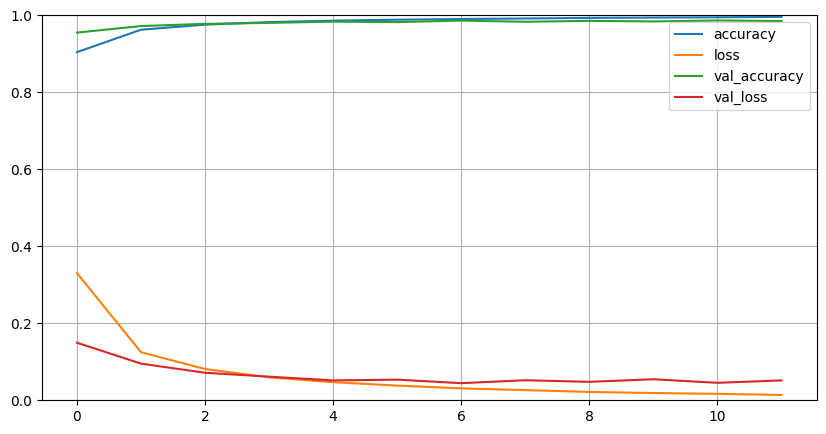

In [13]:
#plotting learning_curves
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

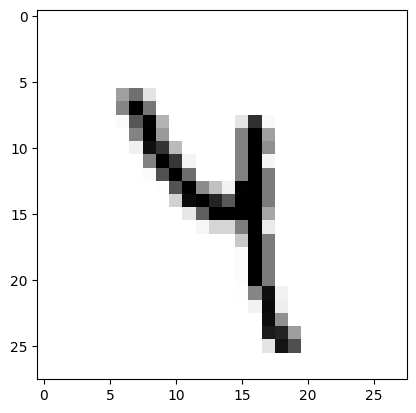

In [14]:
# Plot the Image
image_index = 1437
plt.imshow(X_test[image_index], cmap='Greys')

In [15]:
# Make Prediction
pred = model.predict(X_test_scaled[image_index].reshape(1,32,32,1))
print(pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
4
